In [2]:
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Optimization functions

sthocastic gradient descent

In [52]:
def SGD(loss, grad_loss, D, theta0, alpha, batch_size, n_epochs):
    X, y = D  # Unpack the data
    d = theta0.shape[0] # While theta0 has shape (d, )
    idx = np.arange(0, N) # This is required for the shuffling

    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each epoch
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each epoch
    
    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            
            # Compute the gradient of the loss
            gradient = grad_loss(theta, X_batch, y_batch)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            # Update weights
            theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
        loss_history[epoch] = loss(theta, X, y)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)
    
    return theta_history, loss_history, grad_norm_history

gradient descent

In [53]:
def GD(loss, grad_loss, D, theta0, alpha, n_epochs):
    X, y = D  # Unpack the data
    N = X.shape[0] # We assume both X and Y has shape (N, )
    d = theta0.shape[0] # While theta0 has shape (d, )
    idx = np.arange(0, N) # This is required for the shuffling

    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each epoch
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each epoch
    
    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Compute the gradient of the loss
        gradient = grad_loss(theta, X, y)
        grad_norm_history[epoch] = np.linalg.norm(gradient, 2)

        # Update weights
        theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
        loss_history[epoch] = loss(theta, X, y)
    
    return theta_history, loss_history, grad_norm_history

Normal Equations

In [54]:
def NE(K, D):
    x, y = D
    N = x.shape[0]
    PhiX = vandermonde(x, K)
    # solve X XT theta = X Y
    L = np.linalg.cholesky(PhiX @ PhiX.T)
    # solve L z = X Y
    z = np.linalg.solve(L, PhiX @ y)
    # solve LT theta = z
    theta = np.linalg.solve(L.T, z)
    return theta

def vandermonde(x, K):
    v = np.ones((K, N))
    for i in range(1, K):
        v[i] = x ** i
    return v


#### Load data

In [80]:
data_large = pd.read_csv("../data/poly_regression_large.csv")
X_large, Y_large = data_large["x"], data_large["y"]
X_train_large, X_test_large, Y_train_large, Y_test_large = train_test_split(X_large, Y_large, test_size=0.20, random_state=333, shuffle=True)
X_test_large, Y_test_large = np.array(X_test_large), np.array(Y_test_large)

data_small = pd.read_csv("../data/poly_regression_small.csv")
X_small, Y_small = np.array(data_small["x"]), np.array(data_small["y"])

# MLE

In [100]:
K = 6 # polynomial degree
N = X_small.shape[0] # number of points
batch_size = 5
n_epochs = 100
theta0 = np.zeros((K))
alpha = 0.01

# MLE
def f(theta, x):
    return (np.vander(x, K, True)@theta)

def loss(theta, x, y):
    return (1/2) * np.linalg.norm((np.vander(X_small, K, True)@theta)-(Y_small.T),2)**2

def grad_loss(theta, x, y):
    X_vander = np.vander(x, K, True)
    error = X_vander @ theta - y.T
    return X_vander.T @ error

### Compute the MLE

In [101]:
theta_SGD, _, _ = SGD(loss, grad_loss, (X_small, Y_small), theta0, alpha, batch_size, n_epochs)
theta_SGD = theta_SGD[-1]
theta_GD, _, _ = GD(loss, grad_loss, (X_small, Y_small), theta0, alpha, n_epochs)
theta_GD = theta_GD[-1]
theta_NE = NE(K, (X_small, Y_small))

### Compute the prediction error

In [102]:
err_SGD = np.sum(np.square((np.vander(X_small, K, True)@theta_SGD)-(Y_small.T))) / N
err_GD = np.sum(np.square((np.vander(X_small, K, True)@theta_GD)-(Y_small.T))) / N
err_NE = np.sum(np.square((np.vander(X_small, K, True)@theta_NE)-(Y_small.T))) / N

print(f"Error with SGD:\t {err_SGD}")
print(f"Error with GD:\t {err_GD}")
print(f"Error with NE:\t {err_NE}")

Error with SGD:	 0.028755727957860272
Error with GD:	 0.02888341004105323
Error with NE:	 0.009338386106232843


## Plots

### Regression model

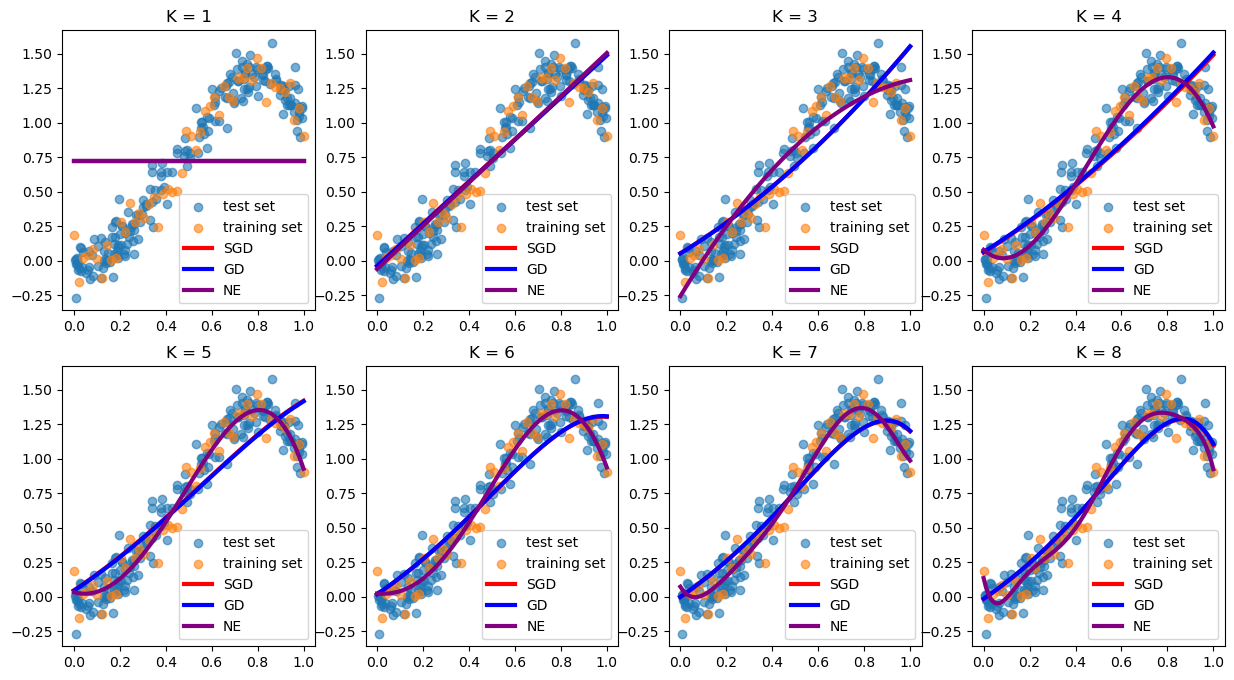

In [128]:
thetas_SGD = []
thetas_GD = []
thetas_NE = []

for K in range(1, 9):
    theta0 = np.zeros((K))
    theta_SGD, _, _ = SGD(loss, grad_loss, (X_small, Y_small), theta0, alpha, batch_size, n_epochs)
    thetas_SGD.append(theta_SGD[-1])
    theta_GD, _, _ = GD(loss, grad_loss, (X_small, Y_small), theta0, alpha, n_epochs)
    thetas_GD.append(theta_GD[-1])
    theta_NE = NE(K, (X_small, Y_small))
    thetas_NE.append(theta_NE)

plt.figure(figsize=(15,8))
for K in range(1, 9):
    x = np.linspace(0,1, 100)
    plt.subplot(2,4,K)
    plt.scatter(X_test_large, Y_test_large, alpha=0.6, label="test set")
    plt.scatter(X_small, Y_small, alpha=0.6, label="training set")
    plt.plot(x, f(thetas_SGD[K-1], x), color="red", linewidth=3, label="SGD")
    plt.plot(x, f(thetas_GD[K-1], x), color="blue", linewidth=3, label="GD")
    plt.plot(x, f(thetas_NE[K-1], x), color="purple", linewidth=3, label="NE")
    plt.title(f"K = {K}")
    plt.legend()
plt.show()

### Error

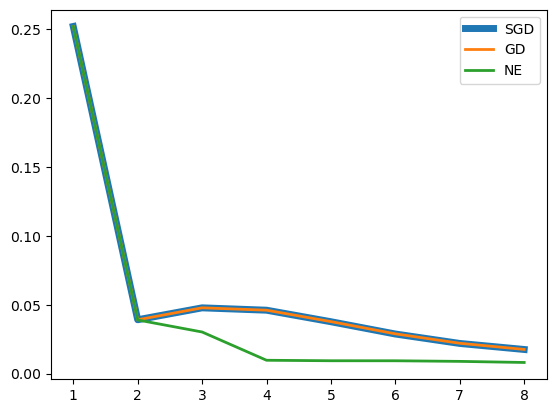

In [ ]:
errs_SGD = []
errs_GD = []
errs_NE = []

for K in range(1, 9):
    err_SGD = np.sum(np.square((np.vander(X_small, K, True)@thetas_SGD[K-1])-(Y_small.T))) / N
    err_GD = np.sum(np.square((np.vander(X_small, K, True)@thetas_GD[K-1])-(Y_small.T))) / N
    err_NE = np.sum(np.square((np.vander(X_small, K, True)@thetas_NE[K-1])-(Y_small.T))) / N
    errs_SGD.append(err_SGD)
    errs_GD.append(err_GD)
    errs_NE.append(err_NE)

x = list(range(1, 9))
plt.plot(x, errs_SGD, linewidth=5, label="SGD")
plt.plot(x, errs_GD, linewidth=2,label="GD")
plt.plot(x, errs_NE, linewidth=2,label="NE")
plt.legend()
plt.show()

# MAP

In [153]:
K = 6 # polynomial degree
N = X_small.shape[0] # number of points
batch_size = 5
n_epochs = 100
theta0 = np.zeros((K))
alpha = 0.01
l = 10 # lambda

# MAP
def f(theta, x):
    return (np.vander(x, K, True)@theta)

def loss(theta, x, y):
    return ((1/2) * np.linalg.norm((np.vander(X_small, K, True)@theta)-(Y_small.T),2)**2) + ((l/2) * np.linalg.norm(theta, 2)**2)

def grad_loss(theta, x, y):
    X_vander = np.vander(x, K, True)
    error = X_vander @ theta - y.T
    return (X_vander.T @ error) + theta

### Compute the MAP

In [154]:
theta_SGD, _, _ = SGD(loss, grad_loss, (X_small, Y_small), theta0, alpha, batch_size, n_epochs)
theta_SGD = theta_SGD[-1]
theta_GD, _, _ = GD(loss, grad_loss, (X_small, Y_small), theta0, alpha, n_epochs)
theta_GD = theta_GD[-1]
theta_NE = NE(K, (X_small, Y_small))

### Compute the prediction error

In [155]:
err_SGD = np.sum(np.square((np.vander(X_small, K, True)@theta_SGD)-(Y_small.T))) / N
err_GD = np.sum(np.square((np.vander(X_small, K, True)@theta_GD)-(Y_small.T))) / N
err_NE = np.sum(np.square((np.vander(X_small, K, True)@theta_NE)-(Y_small.T))) / N

print(f"Error with SGD:\t {err_SGD}")
print(f"Error with GD:\t {err_GD}")
print(f"Error with NE:\t {err_NE}")

Error with SGD:	 0.09090014746332686
Error with GD:	 0.044005154572572494
Error with NE:	 0.009338386106232843


## Plots

### Regression model

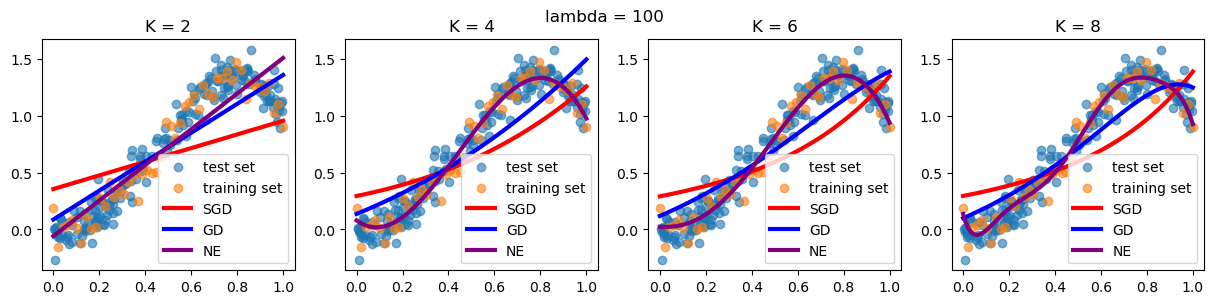

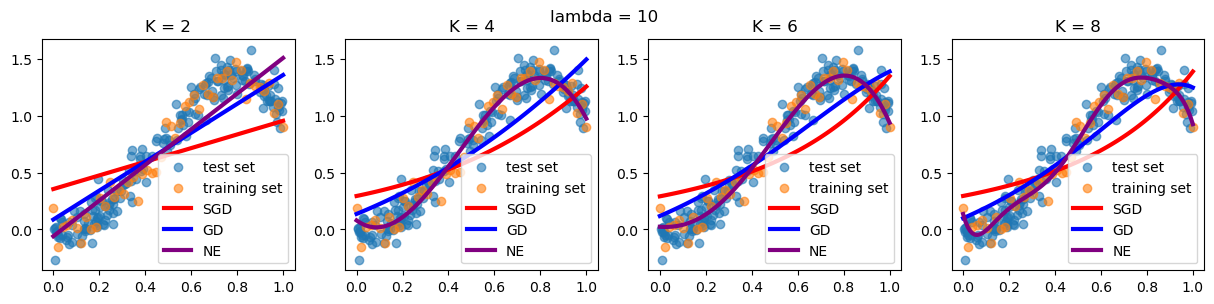

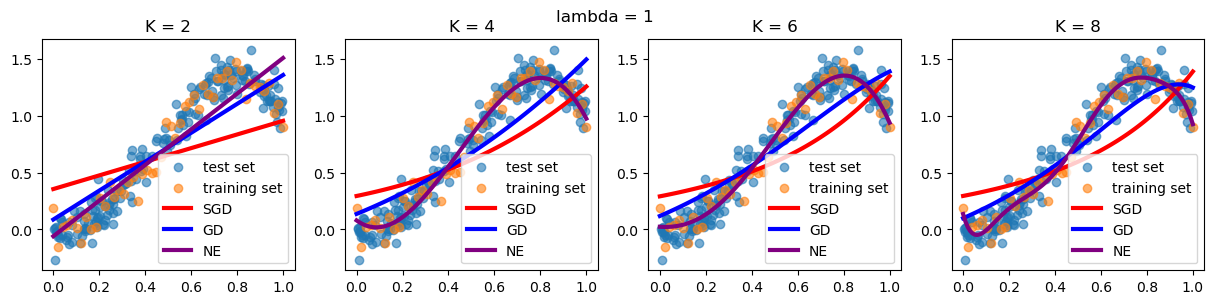

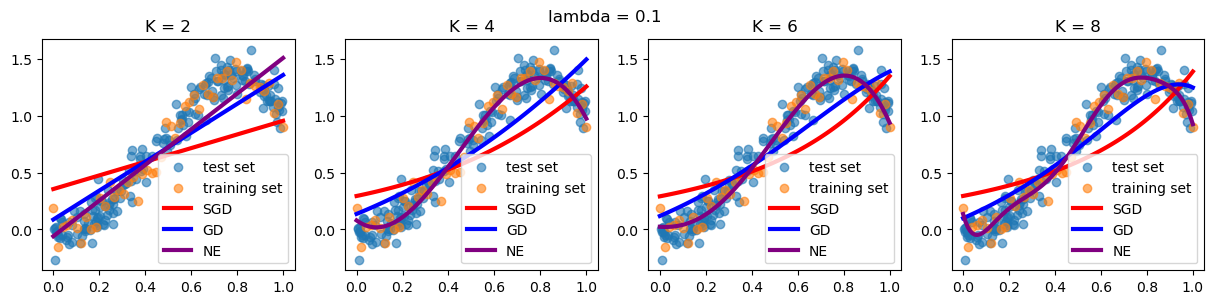

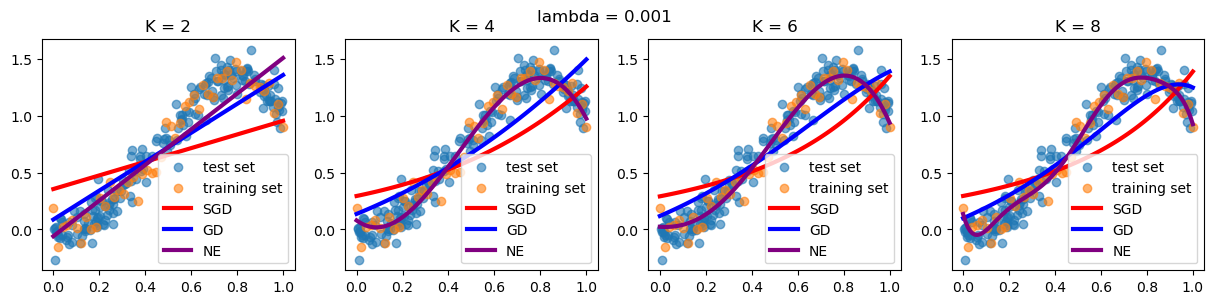

In [164]:
thetas_SGD = []
thetas_GD = []
thetas_NE = []

for l in [100, 10, 1, 0.1, 0.001]:
       
    for K in [2,4,6,8]:
        theta0 = np.zeros((K))
        theta_SGD, _, _ = SGD(loss, grad_loss, (X_small, Y_small), theta0, alpha, batch_size, n_epochs)
        thetas_SGD.append(theta_SGD[-1])
        theta_GD, _, _ = GD(loss, grad_loss, (X_small, Y_small), theta0, alpha, n_epochs)
        thetas_GD.append(theta_GD[-1])
        theta_NE = NE(K, (X_small, Y_small))
        thetas_NE.append(theta_NE)

    plt.figure(figsize=(15,3))
    plt.suptitle(f"lambda = {l}")
    i = 0
    for K in [2,4,6,8]:
        x = np.linspace(0,1, 100)
        plt.subplot(1,4,i+1)
        plt.scatter(X_test_large, Y_test_large, alpha=0.6, label="test set")
        plt.scatter(X_small, Y_small, alpha=0.6, label="training set")
        plt.plot(x, f(thetas_SGD[i], x), color="red", linewidth=3, label="SGD")
        plt.plot(x, f(thetas_GD[i], x), color="blue", linewidth=3, label="GD")
        plt.plot(x, f(thetas_NE[i], x), color="purple", linewidth=3, label="NE")
        plt.title(f"K = {K}")
        plt.legend()
        i += 1
    plt.show()